## Psi Chi R - July 2025

https://osf.io/wxmzk/wiki/home/

Level 1: Preparing the data

• Remove participants who are missing ‘Age’ and ‘BPM’

Level 2: Data inspection

• Identify participants with values considered outliers for ‘BPM’.

a. Test your skills: Visualize outlier values for ‘BPM’.

• Is BPM skewed? If so, how?

• Identify participants with values considered outliers for ‘hourslistened’

• Remove participants with values considered outliers on ‘BPM’ and ‘hourslistened’

Level 2: Descriptives

• Find the mean, standard deviation, median, and range of ‘hourslistened’

a. Test your skills: Find the mean, standard deviation, median, and range of ‘hourslistened’ in one step.

Level 3: Inferential + Other Statistics

• Is there a statistically significant correlation between the number of hours someone listened to EDM and their depression score?

• Is there a significant relationship between the frequency of listening to metal music and the mental health effects of listening to music?

Test your skills: Is there a statistically significant difference in anxiety scores between people who listen to Jazz ‘very frequently’ and ‘never?’

Test your skills: Is there a statistically significant difference in Insomnia scores between people whose favorite genre is “pop” and people whose favorite genre is “rap?”

Level 4: Visualization

• Graph the relationship between the number of hours someone listens to music and their OCD score

## Load packages

In [22]:
#rm(list=ls())

In [23]:

## sum rows
sum_rows = function(x) {
  x = as.data.frame(x)
  sums = sapply(x,function(col) if (is.numeric(col)) sum(col, na.rm = T) else NA)
  sums = as.data.frame(t(sums))
  names(sums) = names(x)
  rbind(x, sums)
}

## right column for total
sum_cols = function(x) {
  x$Total = rowSums(x[sapply(x, is.numeric)], na.rm = T)
  x
}

#dollar format function
dollars = function(x) {
  paste0("$",format(x,big.mark= ",",scientific=F))
}

desc_stats = function(x){
  c(min = min(x,na.rm=T),
    median = median(x,na.rm=T),
    max = max(x,na.rm=T),
    mean = mean(x,na.rm=T),
    sd = sd(x,na.rm=T))
}

#numeric notations
options(scipen=9999)

library(tidyverse)
library(readxl)

In [24]:
sheet_URL = "https://osf.io/download/edn8q/"

download.file(sheet_URL, destfile = "data.csv")

data = read.csv("data.csv")

In [25]:
data |> head()

,Timestamp,Age,Primary.streaming.service,hourslistened,While.working,Instrumentalist,Composer,Fav.genre,Exploratory,Foreign.languages,⋯,Frequency..Pop.,Frequency..R.B.,Frequency..Rap.,Frequency..Rock.,Frequency..Video.game.music.,Anxiety,Depression,Insomnia,OCD,Music.effects
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,8/27/2022 19:29,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,⋯,Very frequently,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,
2,8/27/2022 19:57,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,⋯,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,
3,8/27/2022 21:28,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
4,8/27/2022 21:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
5,8/27/2022 21:54,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve
6,8/27/2022 21:56,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,⋯,Very frequently,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve


## Clean and join

In [26]:
names(data) = trimws(str_to_lower(str_replace_all(names(data), " ", "_")))

In [27]:
str(data)

'data.frame':	736 obs. of  32 variables:
 $ timestamp                   : chr  "8/27/2022 19:29" "8/27/2022 19:57" "8/27/2022 21:28" "8/27/2022 21:40" ...
 $ age                         : int  18 63 18 61 18 18 18 21 19 18 ...
 $ primary.streaming.service   : chr  "Spotify" "Pandora" "Spotify" "YouTube Music" ...
 $ hourslistened               : num  3 1.5 4 2.5 4 5 3 1 6 1 ...
 $ while.working               : chr  "Yes" "Yes" "No" "Yes" ...
 $ instrumentalist             : chr  "Yes" "No" "No" "No" ...
 $ composer                    : chr  "Yes" "No" "No" "Yes" ...
 $ fav.genre                   : chr  "Latin" "Rock" "Video game music" "Jazz" ...
 $ exploratory                 : chr  "Yes" "Yes" "No" "Yes" ...
 $ foreign.languages           : chr  "Yes" "No" "Yes" "Yes" ...
 $ bpm                         : int  156 119 132 84 107 86 66 95 94 155 ...
 $ frequency..classical.       : chr  "Rarely" "Sometimes" "Never" "Sometimes" ...
 $ frequency..country.         : chr  "Never" "Never" 

## Level 1: Preparing the data
Remove participants who are missing ‘Age’ and ‘BPM’

In [28]:
data1=data |> filter(!is.na(age) & !is.na(bpm))

dim(data1)

[1] 629  32

## Level 2: Data inspection

• Identify participants with values considered outliers for ‘BPM’.

a. Test your skills: Visualize outlier values for ‘BPM’.

• Is BPM skewed? If so, how?

• Identify participants with values considered outliers for ‘hourslistened’

• Remove participants with values considered outliers on ‘BPM’ and ‘hourslistened’

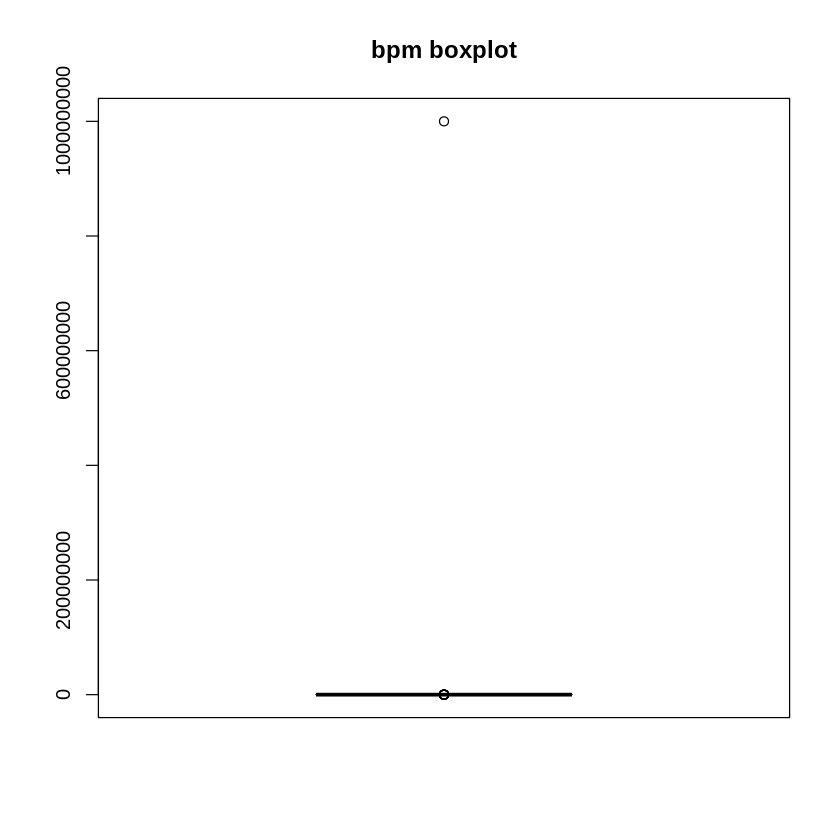

In [29]:
data1$bpm2 = as.numeric(data1$bpm)

boxplot(data1$bpm2)
title('bpm boxplot')

#BPM is skewed because there's an outlier that's over one million

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     52     100     120     122     140     194 

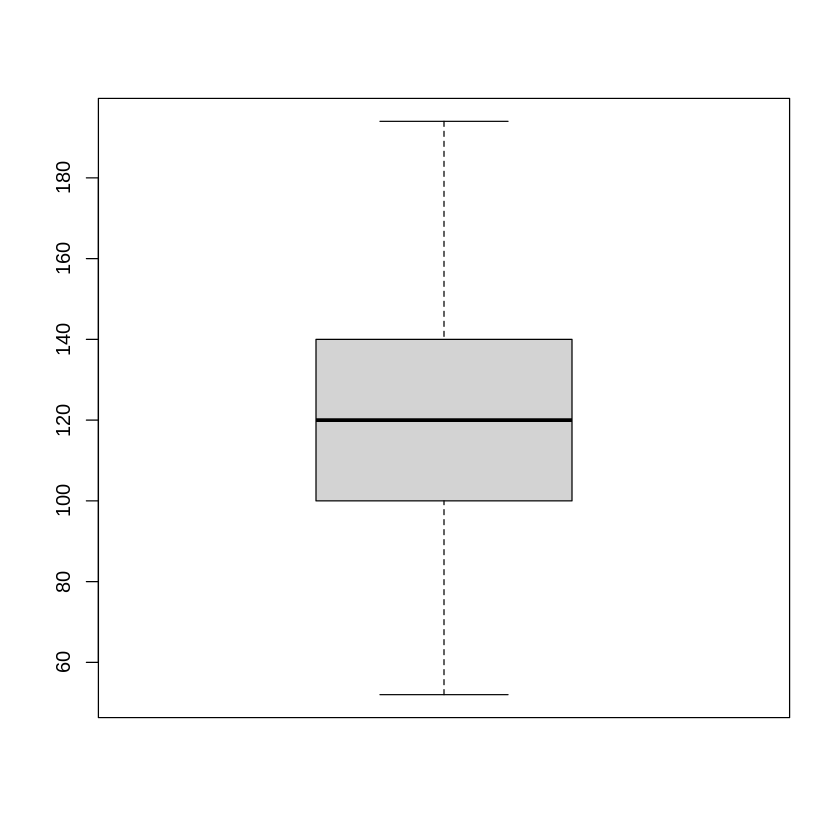

In [30]:
data2 = data1 |> filter(bpm < 200 & bpm > 40)

boxplot(data2$bpm)
summary(data2$bpm)

## Level 2: Descriptives

• Find the mean, standard deviation, median, and range of ‘hourslistened’

a. Test your skills: Find the mean, standard deviation, median, and range of ‘hourslistened’ in one step.

In [31]:
print(desc_stats(data2$hourslistened))

#range: 0 to 24

      min    median       max      mean        sd 
 0.000000  3.000000 24.000000  3.726403  3.108148 


## Level 3: Inferential + Other Statistics

Test your skills: Is there a statistically significant difference in anxiety scores between people who listen to Jazz ‘very frequently’ and ‘never?’

Test your skills: Is there a statistically significant difference in Insomnia scores between people whose favorite genre is “pop” and people whose favorite genre is “rap?”

### Is there a statistically significant correlation between the number of hours someone listened to EDM and their depression score?

In [32]:
head(data2)

,timestamp,age,primary.streaming.service,hourslistened,while.working,instrumentalist,composer,fav.genre,exploratory,foreign.languages,⋯,frequency..r.b.,frequency..rap.,frequency..rock.,frequency..video.game.music.,anxiety,depression,insomnia,ocd,music.effects,bpm2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,8/27/2022 19:29,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,⋯,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,,156
2,8/27/2022 19:57,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,⋯,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,,119
3,8/27/2022 21:28,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,132
4,8/27/2022 21:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Sometimes,Never,Never,Never,9,7,3,3,Improve,84
5,8/27/2022 21:54,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,107
6,8/27/2022 21:56,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,⋯,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve,86


In [33]:
list_1 = c('hourslistened','depression')

data2_edm = data2 |>
  filter(grepl("edm",fav.genre,ignore.case = T))
  #filter(str_detect(fav.genre,"EDM"))

head(data2_edm)

,timestamp,age,primary.streaming.service,hourslistened,while.working,instrumentalist,composer,fav.genre,exploratory,foreign.languages,⋯,frequency..r.b.,frequency..rap.,frequency..rock.,frequency..video.game.music.,anxiety,depression,insomnia,ocd,music.effects,bpm2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,8/27/2022 23:00,19,YouTube Music,8,Yes,No,No,EDM,Yes,No,⋯,Rarely,Sometimes,Rarely,Rarely,1,0,0,1,Improve,125
2,8/28/2022 11:39,20,Spotify,4,Yes,No,No,EDM,Yes,No,⋯,Very frequently,Sometimes,Very frequently,Rarely,7,2,8,6,Improve,161
3,8/28/2022 12:37,17,Apple Music,2,Yes,Yes,No,EDM,Yes,No,⋯,Sometimes,Sometimes,Very frequently,Rarely,0,0,0,0,Improve,128
4,8/28/2022 14:10,18,YouTube Music,2,No,No,No,EDM,No,Yes,⋯,Rarely,Sometimes,Rarely,Very frequently,9,0,5,10,Improve,150
5,8/28/2022 15:02,20,Spotify,3,No,No,Yes,EDM,Yes,Yes,⋯,Never,Sometimes,Sometimes,Rarely,0,3,7,0,Improve,121
6,8/28/2022 16:32,22,Spotify,1,No,No,Yes,EDM,Yes,No,⋯,Very frequently,Sometimes,Sometimes,Never,2,7,5,0,Improve,128


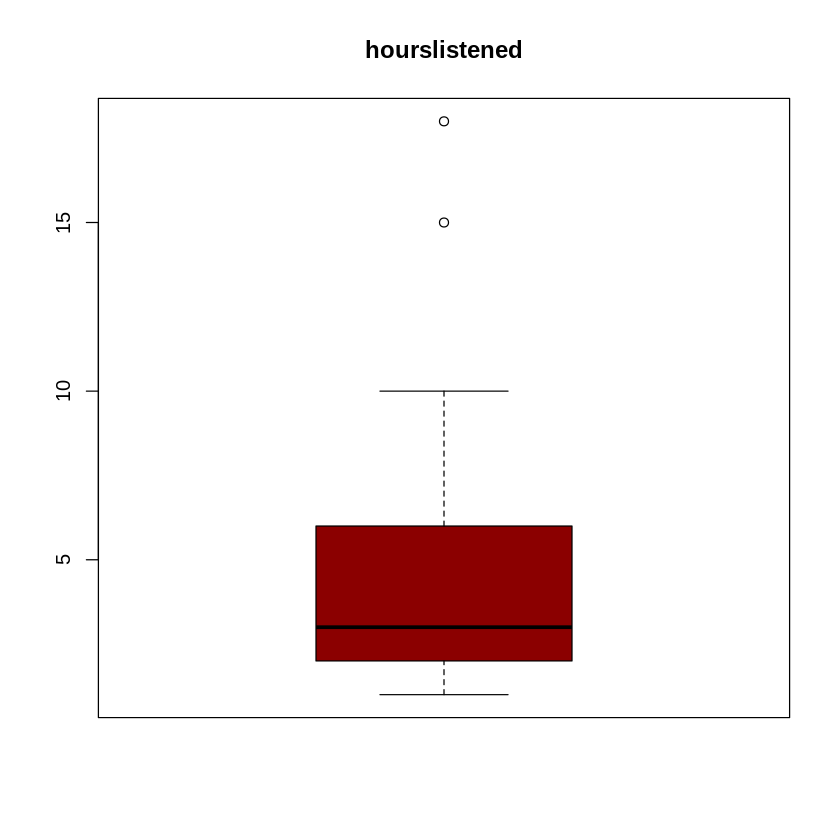

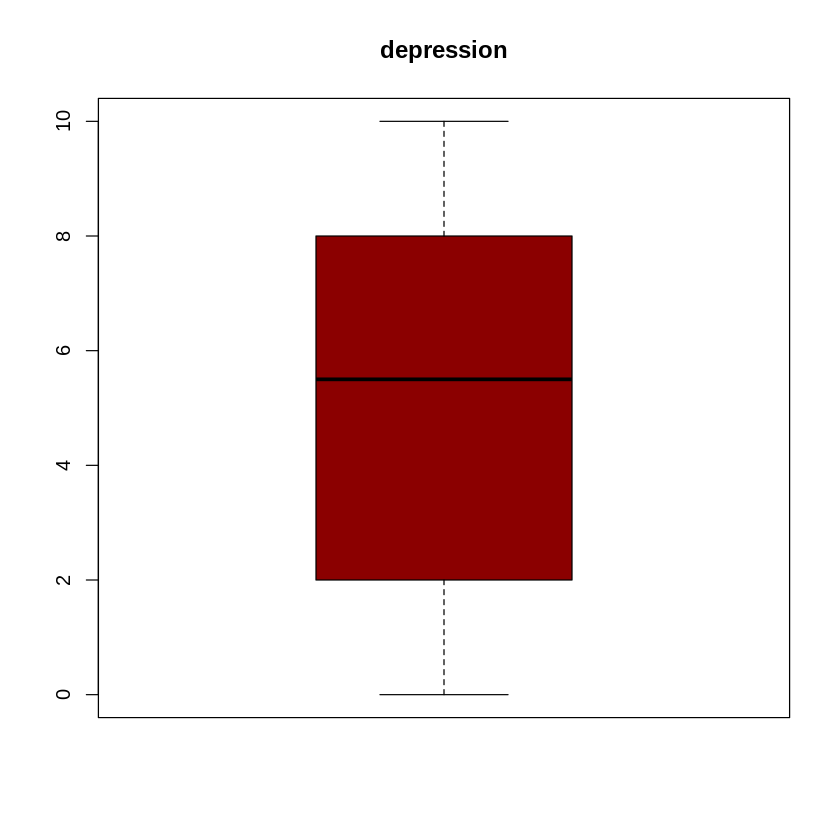

In [34]:
for (i in list_1){
  x = boxplot(data2_edm[i],col='darkred')
title(i)
}

data3 = data2_edm |> filter(hourslistened < 15)

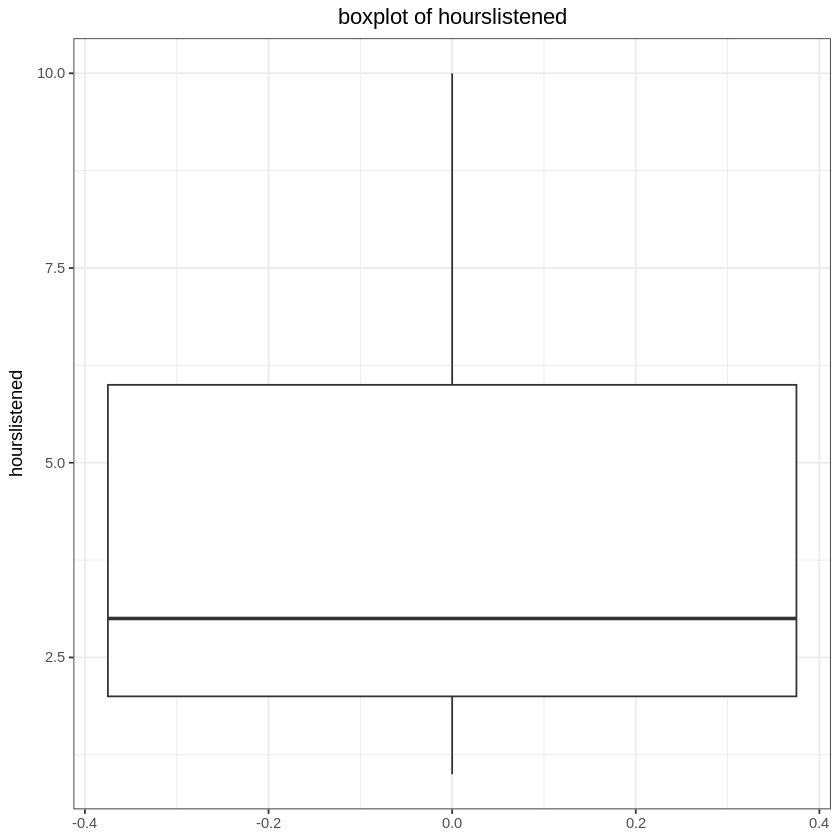

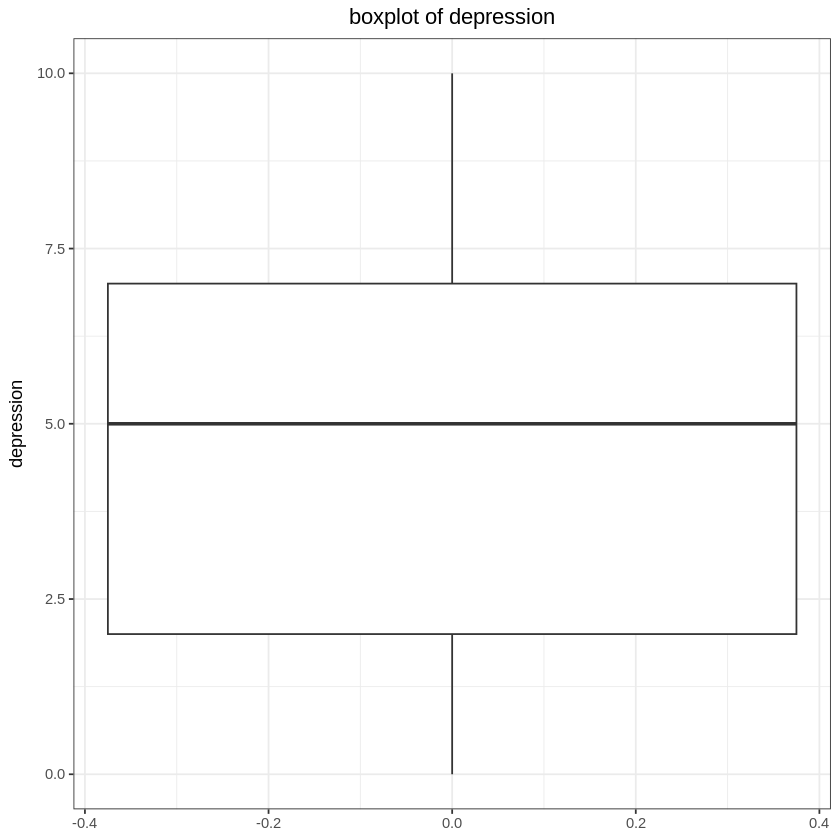

In [35]:
for (i in list_1){
  x = ggplot(data3,aes(y=.data[[i]]))+theme_bw()+geom_boxplot()+labs(title= paste("boxplot of", i)) +theme(plot.title = element_text(hjust = .5))
  print(x)
}

[1] "hourslistened"


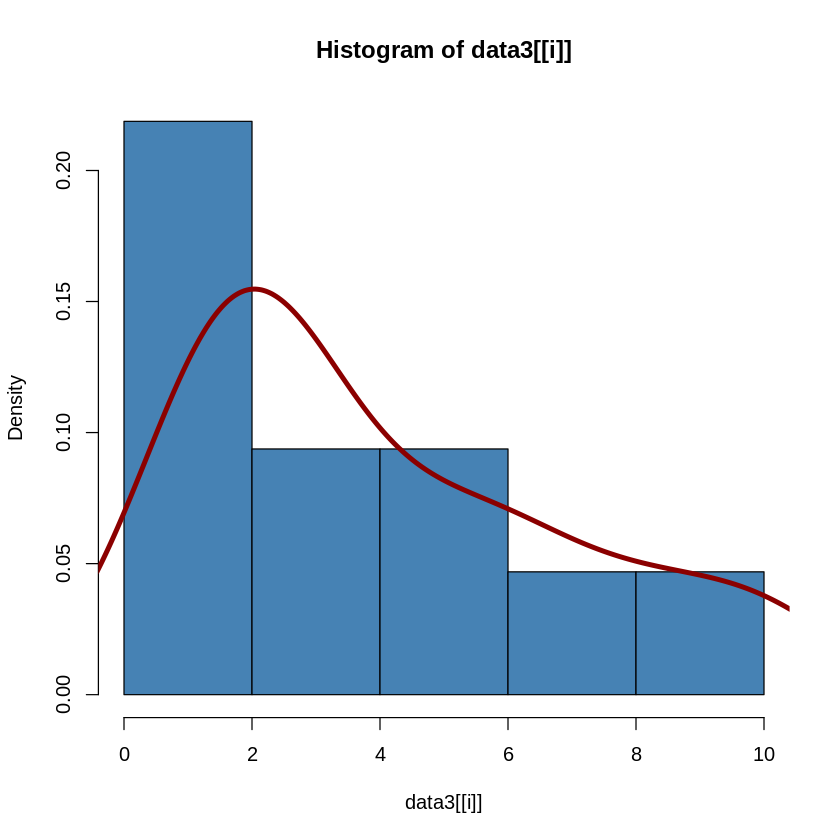

[1] "depression"


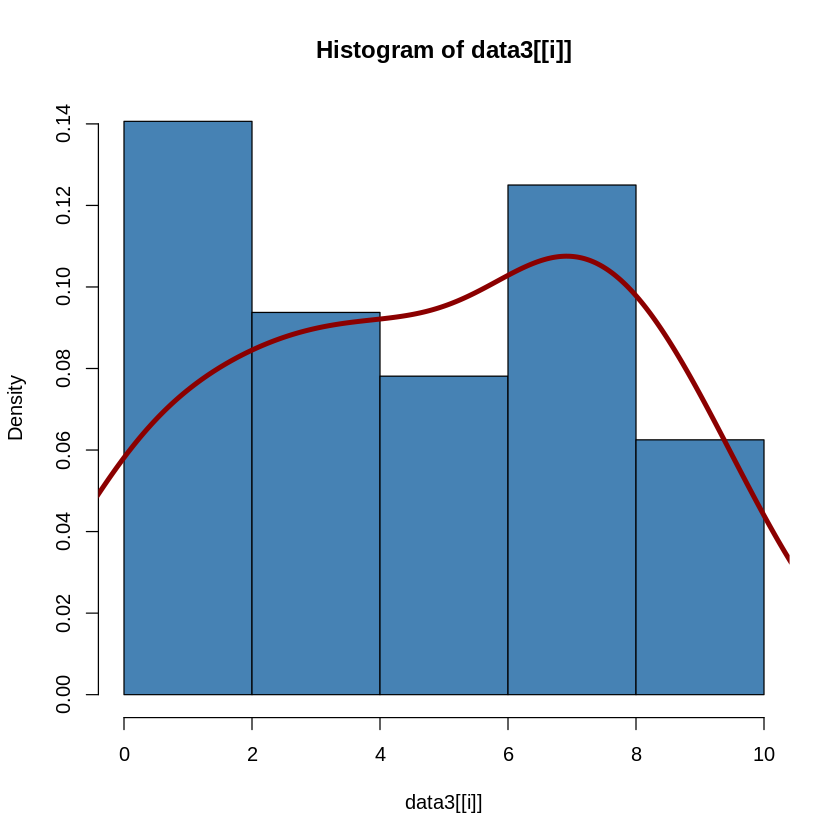

In [36]:
for (i in list_1){
  hist(data3[[i]],probability = T,col='steelblue')
  lines(density(data3[[i]]),col='darkred',lwd=4)

  print(i)
}

In [37]:
method_list = list('s','k','p')

for (i in method_list){
  x = cor.test(data3$hourslistened,data3$depression,method=i)
  print(x)
}

#no statistical signifiance between hours listened to EDM and depression score

Warning message in cor.test.default(data3$hourslistened, data3$depression, method = i):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data3$hourslistened and data3$depression
S = 5107.7, p-value = 0.7285
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.06383976 



Warning message in cor.test.default(data3$hourslistened, data3$depression, method = i):
“Cannot compute exact p-value with ties”



	Kendall's rank correlation tau

data:  data3$hourslistened and data3$depression
z = 0.16593, p-value = 0.8682
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.02248009 


	Pearson's product-moment correlation

data:  data3$hourslistened and data3$depression
t = 1.1254, df = 30, p-value = 0.2693
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1585532  0.5138964
sample estimates:
      cor 
0.2012682 



### Is there a significant relationship between the frequency of listening to metal music and the mental health effects of listening to music?

In [38]:
slice_sample(data2,n=5)

unique(data2$fav.genre)

timestamp,age,primary.streaming.service,hourslistened,while.working,instrumentalist,composer,fav.genre,exploratory,foreign.languages,⋯,frequency..r.b.,frequency..rap.,frequency..rock.,frequency..video.game.music.,anxiety,depression,insomnia,ocd,music.effects,bpm2
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
8/28/2022 12:39,16,Spotify,6.0,Yes,No,No,K pop,Yes,Yes,⋯,Very frequently,Very frequently,Rarely,Never,7,8,7,5,Improve,169
9/13/2022 8:36,19,Spotify,4.0,No,No,No,Pop,No,Yes,⋯,Sometimes,Sometimes,Sometimes,Sometimes,9,6,3,0,No effect,120
8/28/2022 21:06,19,Spotify,3.0,Yes,No,Yes,Rock,Yes,Yes,⋯,Rarely,Never,Very frequently,Rarely,9,10,4,0,Improve,76
8/28/2022 14:10,18,YouTube Music,2.0,No,No,No,EDM,No,Yes,⋯,Rarely,Sometimes,Rarely,Very frequently,9,0,5,10,Improve,150
8/29/2022 9:26,33,YouTube Music,0.5,Yes,Yes,No,Rock,No,No,⋯,Never,Never,Sometimes,Rarely,7,9,4,6,Improve,80


[1] "Latin"            "Rock"             "Video game music" "Jazz"            
 [5] "R&B"              "K pop"            "EDM"              "Country"         
 [9] "Hip hop"          "Rap"              "Pop"              "Classical"       
[13] "Metal"            "Folk"             "Lofi"             "Gospel"

In [39]:
data2_metal = data2 |>
  filter(grepl("metal",fav.genre,ignore.case = T))

dim(data2_metal)

slice_sample(data2_metal,n=5)

colnames(data2_metal)

[1] 70 33

timestamp,age,primary.streaming.service,hourslistened,while.working,instrumentalist,composer,fav.genre,exploratory,foreign.languages,⋯,frequency..r.b.,frequency..rap.,frequency..rock.,frequency..video.game.music.,anxiety,depression,insomnia,ocd,music.effects,bpm2
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
9/1/2022 15:05,38,Spotify,3,Yes,No,No,Metal,Yes,Yes,⋯,Never,Rarely,Sometimes,Never,1,6,1,2,Improve,143
8/28/2022 16:13,34,Other streaming service,4,Yes,No,No,Metal,Yes,Yes,⋯,Never,Sometimes,Sometimes,Rarely,6,7,0,0,No effect,161
8/28/2022 19:04,21,Spotify,3,Yes,Yes,Yes,Metal,Yes,No,⋯,Rarely,Sometimes,Very frequently,Sometimes,3,3,7,0,No effect,150
9/3/2022 8:53,18,Other streaming service,3,Yes,Yes,Yes,Metal,Yes,No,⋯,Rarely,Rarely,Rarely,Never,7,8,4,10,Improve,135
9/12/2022 12:14,33,Spotify,2,Yes,No,No,Metal,Yes,Yes,⋯,Sometimes,Sometimes,Very frequently,Sometimes,4,8,0,0,Improve,134


[1] "timestamp"                    "age"                         
 [3] "primary.streaming.service"    "hourslistened"               
 [5] "while.working"                "instrumentalist"             
 [7] "composer"                     "fav.genre"                   
 [9] "exploratory"                  "foreign.languages"           
[11] "bpm"                          "frequency..classical."       
[13] "frequency..country."          "frequency..edm."             
[15] "frequency..folk."             "frequency..gospel."          
[17] "frequency..hip.hop."          "frequency..jazz."            
[19] "frequency..k.pop."            "frequency..latin."           
[21] "frequency..lofi."             "frequency..metal."           
[23] "frequency..pop."              "frequency..r.b."             
[25] "frequency..rap."              "frequency..rock."            
[27] "frequency..video.game.music." "anxiety"                     
[29] "depression"                   "insomnia"                    
[31] "ocd"                          "music.effects"               
[33] "bpm2"

In [40]:
#mental_health_list = c('anxiety','depression','insomnia','ocd')

metal_MH = aov(hourslistened ~ anxiety + depression + insomnia + ocd,data=data2_metal)

summary(metal_MH)

TBC

            Df Sum Sq Mean Sq F value Pr(>F)
anxiety      1    5.5   5.521   0.772  0.383
depression   1    2.8   2.772   0.387  0.536
insomnia     1    0.1   0.067   0.009  0.923
ocd          1    0.1   0.052   0.007  0.932
Residuals   65  465.1   7.155               

ERROR: Error: object 'TBC' not found


### Test your skills: Is there a statistically significant difference in anxiety scores between people who listen to Jazz ‘very frequently’ and ‘never?’


In [ ]:
slice_sample(data2,n=5)

In [ ]:
data2_jazz = data2 |>
  filter(grepl('jazz',fav.genre,ignore.case = T))

slice_sample(data2_jazz,n=5)

In [ ]:
data2_jazz |>
  ggplot(aes(y=anxiety,x=frequency..jazz.))+
  geom_boxplot()

In [ ]:
hist(data2_jazz$anxiety,prob=T,col='steelblue')
lines(density(data2_jazz$anxiety),lwd=2,col='darkred')

shapiro.test(data2_jazz$anxiety)

In [ ]:
chisq.test(data2_jazz$frequency..jazz.,data2_jazz$anxiety)

#no, there's no significant difference as per the p.value of .1581

### Test your skills: Is there a statistically significant difference in Insomnia scores between people whose favorite genre is “pop” and people whose favorite genre is “rap?”

In [44]:
slice_sample(data2,n=5)

data2_genre_pop = data2 |>
  filter(grepl('pop',fav.genre,ignore.case = T))

data2_genre_rap = data2 |>
  filter(grepl('rap',fav.genre,ignore.case = T))

timestamp,age,primary.streaming.service,hourslistened,while.working,instrumentalist,composer,fav.genre,exploratory,foreign.languages,⋯,frequency..r.b.,frequency..rap.,frequency..rock.,frequency..video.game.music.,anxiety,depression,insomnia,ocd,music.effects,bpm2
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
8/28/2022 23:34,15,Spotify,2,Yes,No,No,EDM,No,No,⋯,Rarely,Sometimes,Never,Rarely,9,6,1,7,No effect,171
9/1/2022 18:10,22,Spotify,4,Yes,Yes,No,Lofi,Yes,No,⋯,Rarely,Rarely,Very frequently,Never,9,10,6,7,Improve,141
10/30/2022 13:15,21,Spotify,2,Yes,No,No,R&B,Yes,Yes,⋯,Very frequently,Sometimes,Sometimes,Sometimes,7,6,4,6,Improve,147
8/28/2022 22:32,35,Spotify,4,Yes,Yes,Yes,Country,Yes,Yes,⋯,Rarely,Sometimes,Very frequently,Never,9,9,5,1,Improve,90
8/28/2022 12:23,24,Spotify,3,Yes,No,No,Rock,Yes,Yes,⋯,Never,Never,Very frequently,Sometimes,9,6,4,3,Improve,115


In [64]:
slice_sample(data2_genre_pop,n=5)

slice_sample(data2_genre_rap,n=5)

timestamp,age,primary.streaming.service,hourslistened,while.working,instrumentalist,composer,fav.genre,exploratory,foreign.languages,⋯,frequency..r.b.,frequency..rap.,frequency..rock.,frequency..video.game.music.,anxiety,depression,insomnia,ocd,music.effects,bpm2
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
8/28/2022 16:08,20,Spotify,2.0,Yes,Yes,No,Pop,Yes,No,⋯,Never,Rarely,Very frequently,Sometimes,7,4,6,5,Improve,126
9/1/2022 21:07,74,I do not use a streaming service.,1.0,No,No,No,Pop,No,No,⋯,Sometimes,Never,Sometimes,Never,4,2,1,0,Improve,129
8/28/2022 22:51,53,I do not use a streaming service.,1.5,No,No,No,Pop,Yes,Yes,⋯,Rarely,Sometimes,Sometimes,Never,2,2,2,1,No effect,92
9/2/2022 6:41,19,Spotify,8.0,Yes,No,No,Pop,Yes,Yes,⋯,Sometimes,Very frequently,Very frequently,Rarely,7,2,1,6,Improve,99
8/28/2022 12:39,16,Spotify,6.0,Yes,No,No,K pop,Yes,Yes,⋯,Very frequently,Very frequently,Rarely,Never,7,8,7,5,Improve,169


timestamp,age,primary.streaming.service,hourslistened,while.working,instrumentalist,composer,fav.genre,exploratory,foreign.languages,⋯,frequency..r.b.,frequency..rap.,frequency..rock.,frequency..video.game.music.,anxiety,depression,insomnia,ocd,music.effects,bpm2
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
8/31/2022 5:45,19,YouTube Music,3,No,Yes,No,Rap,Yes,Yes,⋯,Rarely,Very frequently,Sometimes,Sometimes,3,3,0,0,Improve,73
8/28/2022 0:28,17,Spotify,4,Yes,No,No,Rap,Yes,No,⋯,Never,Very frequently,Sometimes,Never,10,10,2,4,Improve,125
8/28/2022 23:47,23,Other streaming service,6,Yes,No,No,Rap,Yes,Yes,⋯,Very frequently,Sometimes,Rarely,Never,3,1,2,7,Improve,87
9/3/2022 16:24,17,Other streaming service,6,Yes,No,Yes,Rap,Yes,No,⋯,Sometimes,Very frequently,Rarely,Never,3,3,0,0,Improve,140
8/29/2022 20:04,18,Apple Music,2,Yes,Yes,No,Rap,Yes,Yes,⋯,Sometimes,Very frequently,Rarely,Sometimes,3,2,0,2,Improve,170



	Shapiro-Wilk normality test

data:  data2_genre_pop$insomnia
W = 0.9028, p-value = 0.0000002736


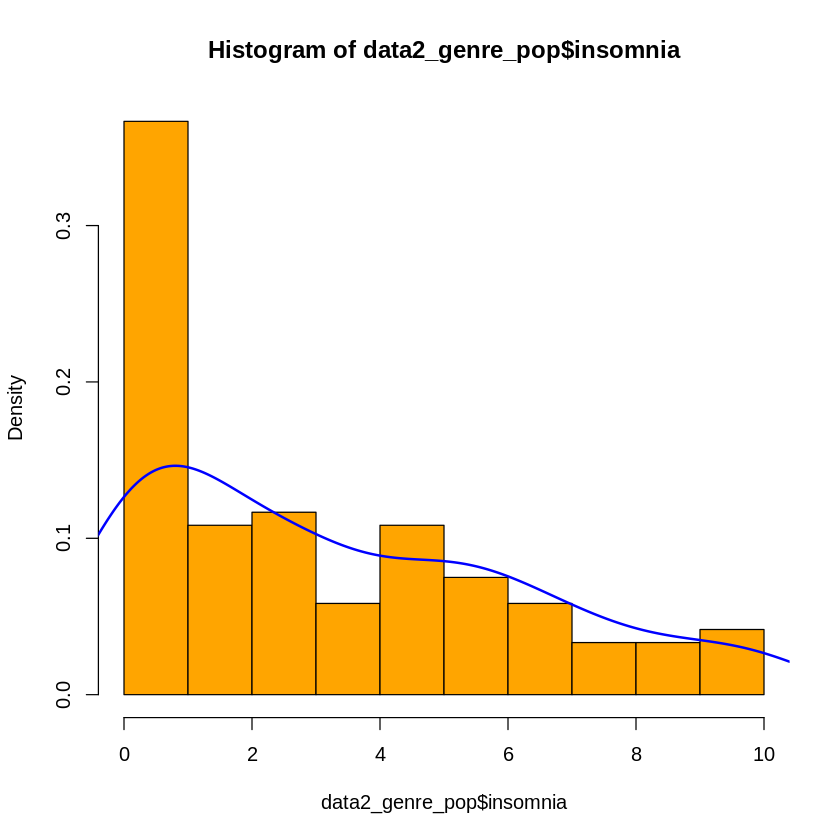


	Shapiro-Wilk normality test

data:  data2_genre_rap$insomnia
W = 0.83135, p-value = 0.002637


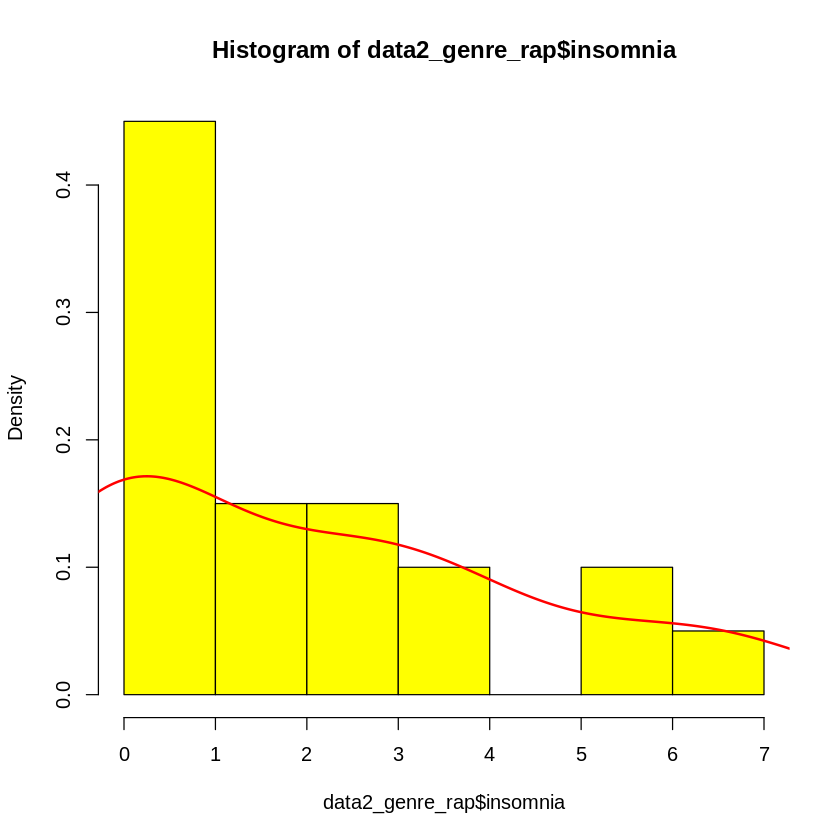

In [78]:
hist(data2_genre_pop$insomnia,probability = T,col='orange')
lines(density(data2_genre_pop$insomnia),lwd=2,col='blue')
shapiro.test(data2_genre_pop$insomnia)

hist(data2_genre_rap$insomnia,probability = T,col='yellow')
lines(density(data2_genre_rap$insomnia),lwd=2,col='red')
shapiro.test(data2_genre_rap$insomnia)

In [86]:
wilcox.test(data2_genre_pop$insomnia,data2_genre_rap$insomnia,paired = F)

#no, pop and rap people do not have a statistical difference in insomnia scores


	Wilcoxon rank sum test with continuity correction

data:  data2_genre_pop$insomnia and data2_genre_rap$insomnia
W = 1500.5, p-value = 0.07086
alternative hypothesis: true location shift is not equal to 0


## Level 4: Visualization

• Graph the relationship between the number of hours someone listens to music and their OCD score

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


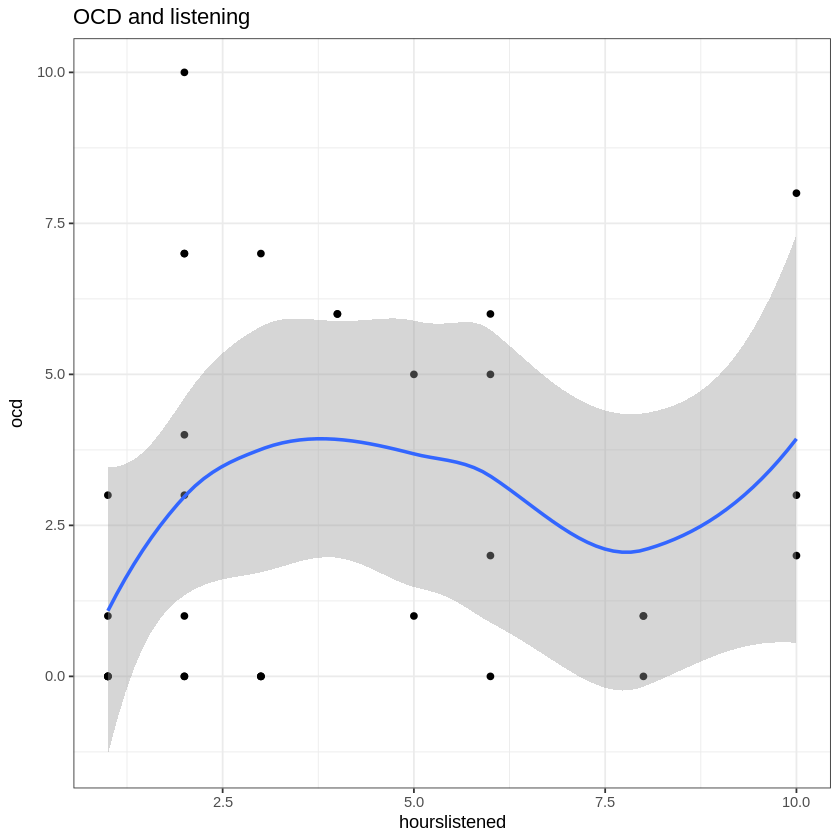

In [41]:
data3 |> ggplot(aes(x=hourslistened,y=ocd))+
  theme_bw()+
  geom_point() +
  geom_smooth()+
  labs(title='OCD and listening')